# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

## Importing Necessary Libraries

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing Dataset

In [220]:
df = pd.read_csv("R:\\Dataset\\car_data.csv")

In [221]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


## Data Cleaning

In [222]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [223]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [224]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


### Outlier Correction

In [225]:
IQR = df.Price.quantile(0.75)-df.Price.quantile(0.25)
UL = df.Price.quantile(0.75) + (1.5*IQR)
LL = df.Price.quantile(0.25) - (1.5*IQR)
UL, LL

(45383.68078365926, -4393.290277667038)

In [226]:
df.Price = df.Price.clip(LL, UL)

In [227]:
IQR = df.Mileage.quantile(0.75)-df.Mileage.quantile(0.25)
UL = df.Mileage.quantile(0.75) + (1.5*IQR)
LL = df.Mileage.quantile(0.25) - (1.5*IQR)
UL, LL

(41097.25, -1260.75)

In [228]:
df.Mileage = df.Mileage.clip(LL, UL)

In [229]:
IQR = df.Liter.quantile(0.75)-df.Liter.quantile(0.25)
UL = df.Liter.quantile(0.75) + (1.5*IQR)
LL = df.Liter.quantile(0.25) - (1.5*IQR)
UL, LL

(6.199999999999999, -0.1999999999999993)

In [230]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21099.998496,19807.086132,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9031.505318,8119.836852,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,45383.680784,41097.250000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [231]:
df.drop_duplicates()
df.shape

(804, 12)

# PART-1 : EDA

<AxesSubplot: xlabel='Price', ylabel='Mileage'>

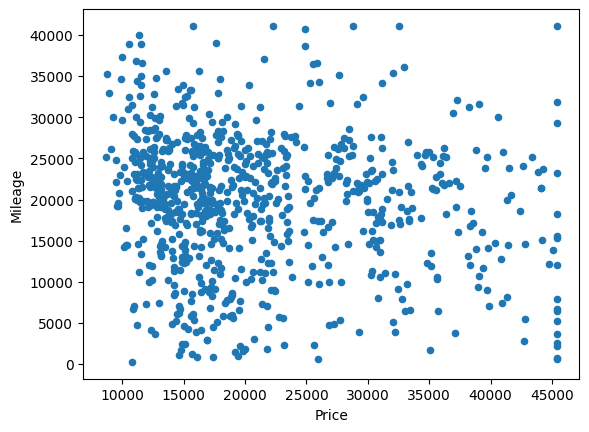

In [232]:
df.plot("Price","Mileage",kind="scatter")

In [233]:
df.corr()

C:\Users\Revanth\AppData\Local\Temp\ipykernel_10788\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.138997,0.569795,0.570744,-0.108917,0.456111,-0.149583,0.155412
Mileage,-0.138997,1.000000,-0.028069,-0.016878,-0.015384,0.023516,-0.025447,-0.000876
Cylinder,0.569795,-0.028069,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.570744,-0.016878,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.108917,-0.015384,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.456111,0.023516,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.149583,-0.025447,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.155412,-0.000876,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


No Linear Relationship has been witnessed

### Trying some transformations to get Linear Relationship between Mileage and Price

In [234]:
df["Mileage_transformed"] = np.log2(df["Mileage"])

In [235]:
df.corr()

C:\Users\Revanth\AppData\Local\Temp\ipykernel_10788\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Mileage_transformed
Price,1.000000,-0.138997,0.569795,0.570744,-0.108917,0.456111,-0.149583,0.155412,-0.128535
Mileage,-0.138997,1.000000,-0.028069,-0.016878,-0.015384,0.023516,-0.025447,-0.000876,0.899367
Cylinder,0.569795,-0.028069,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520,-0.033603
Liter,0.570744,-0.016878,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332,-0.023885
Doors,-0.108917,-0.015384,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969,-0.006214
Cruise,0.456111,0.023516,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573,0.016361
Sound,-0.149583,-0.025447,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444,-0.021773
Leather,0.155412,-0.000876,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000,-0.006579
Mileage_transformed,-0.128535,0.899367,-0.033603,-0.023885,-0.006214,0.016361,-0.021773,-0.006579,1.000000


In [236]:
df["Mileage_transformed"] = np.power(df["Mileage"],2)

In [237]:
df.corr()

C:\Users\Revanth\AppData\Local\Temp\ipykernel_10788\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Mileage_transformed
Price,1.000000,-0.138997,0.569795,0.570744,-0.108917,0.456111,-0.149583,0.155412,-0.123135
Mileage,-0.138997,1.000000,-0.028069,-0.016878,-0.015384,0.023516,-0.025447,-0.000876,0.959569
Cylinder,0.569795,-0.028069,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520,-0.020965
Liter,0.570744,-0.016878,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332,-0.010184
Doors,-0.108917,-0.015384,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969,-0.021124
Cruise,0.456111,0.023516,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573,0.023391
Sound,-0.149583,-0.025447,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444,-0.015779
Leather,0.155412,-0.000876,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000,0.004880
Mileage_transformed,-0.123135,0.959569,-0.020965,-0.010184,-0.021124,0.023391,-0.015779,0.004880,1.000000


In [238]:
df["Mileage_transformed"] = np.power(df["Mileage"],3)

In [239]:
df.corr()

C:\Users\Revanth\AppData\Local\Temp\ipykernel_10788\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Mileage_transformed
Price,1.000000,-0.138997,0.569795,0.570744,-0.108917,0.456111,-0.149583,0.155412,-0.100628
Mileage,-0.138997,1.000000,-0.028069,-0.016878,-0.015384,0.023516,-0.025447,-0.000876,0.880417
Cylinder,0.569795,-0.028069,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520,-0.015504
Liter,0.570744,-0.016878,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332,-0.007070
Doors,-0.108917,-0.015384,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969,-0.024017
Cruise,0.456111,0.023516,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573,0.021797
Sound,-0.149583,-0.025447,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444,-0.006467
Leather,0.155412,-0.000876,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000,0.012008
Mileage_transformed,-0.100628,0.880417,-0.015504,-0.007070,-0.024017,0.021797,-0.006467,0.012008,1.000000


In [240]:
df["Mileage_transformed"] = np.power(df["Mileage"],4)

In [241]:
df.corr()

C:\Users\Revanth\AppData\Local\Temp\ipykernel_10788\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Mileage_transformed
Price,1.000000,-0.138997,0.569795,0.570744,-0.108917,0.456111,-0.149583,0.155412,-0.078134
Mileage,-0.138997,1.000000,-0.028069,-0.016878,-0.015384,0.023516,-0.025447,-0.000876,0.794066
Cylinder,0.569795,-0.028069,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520,-0.012281
Liter,0.570744,-0.016878,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332,-0.006762
Doors,-0.108917,-0.015384,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969,-0.024801
Cruise,0.456111,0.023516,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573,0.020395
Sound,-0.149583,-0.025447,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444,0.000536
Leather,0.155412,-0.000876,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000,0.019322
Mileage_transformed,-0.078134,0.794066,-0.012281,-0.006762,-0.024801,0.020395,0.000536,0.019322,1.000000


In [242]:
df["Mileage_transformed"] = np.exp(df["Mileage"])

C:\Users\Revanth\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [243]:
df.corr()

C:\Users\Revanth\AppData\Local\Temp\ipykernel_10788\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Mileage_transformed
Price,1.000000,-0.138997,0.569795,0.570744,-0.108917,0.456111,-0.149583,0.155412,-0.0
Mileage,-0.138997,1.000000,-0.028069,-0.016878,-0.015384,0.023516,-0.025447,-0.000876,0.0
Cylinder,0.569795,-0.028069,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520,0.0
Liter,0.570744,-0.016878,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332,0.0
Doors,-0.108917,-0.015384,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969,0.0
Cruise,0.456111,0.023516,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573,NaN
Sound,-0.149583,-0.025447,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444,-0.0
Leather,0.155412,-0.000876,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000,-0.0
Mileage_transformed,-0.000000,0.000000,0.000000,0.000000,0.000000,NaN,-0.000000,-0.000000,NaN


 Even after checking out various Transformations for Mileage column to get Linear Relationship, but couldn't get the Linear Relationship. Hence, proceeding with the original Mileage column data.


In [244]:
df= df.drop("Mileage_transformed", axis=1)

## Splitting of Dataset

In [245]:
x = df.loc[:,["Mileage"]].values
y = df.loc[:, "Price"].values

In [246]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

## Model

In [247]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [248]:
LR.intercept_

24309.34235298042

In [249]:
LR.coef_

array([-0.16826882])

In [250]:
pred_y = LR.predict(x_test)

## 1. Linear Regression Equation

## 2. Chart the original data and the equation on the chart.

In [251]:
dff = pd.DataFrame({"Actual":y_test, "Predicted":pred_y})

In [252]:
dff

,Actual,Predicted
0,15163.169859,21422.186002
1,24405.066760,19035.124573
2,15138.400824,18847.000037
3,10354.043852,21865.910871
4,13688.000109,21151.609745
...,...,...
156,21183.123587,20709.399296
157,23348.016954,20266.347503
158,12274.957581,21009.254327
159,18800.093103,23328.839960


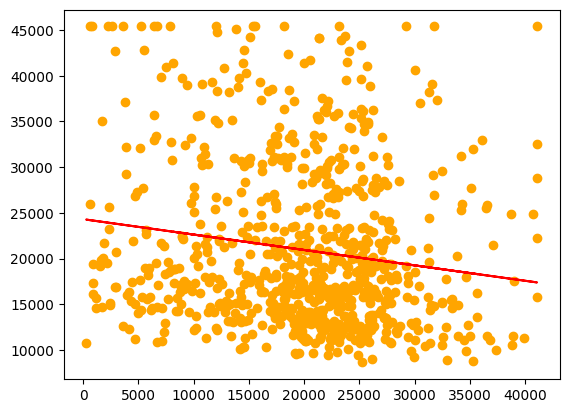

In [253]:
plt.scatter(x,y, color="orange")
plt.plot(x, LR.predict(x), color="red")

## 3. Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data.

In [254]:
from sklearn import metrics
s = LR.score(x_test,y_test)

In [255]:
print("The R2-Score of this model is",s)

The R2-Score of this model is -0.001889530195292144


## Trying Ridge Regression

In [256]:
from sklearn.linear_model import Ridge
R = Ridge()
R.fit(x_train, y_train)
#y_predi = R.predict(x_test)
from sklearn import metrics
rr = R.score(x_test, y_test)
rr

-0.0018895301948713694

## Trying Lasso Regression

In [257]:
from sklearn.linear_model import Lasso
L = Lasso()
L.fit(x_train, y_train)
#y_predi = R.predict(x_test)
from sklearn import metrics
lar = L.score(x_test, y_test)
lar

-0.0018895285863353983

# Part-2 : EDA

<AxesSubplot: xlabel='Cylinder'>

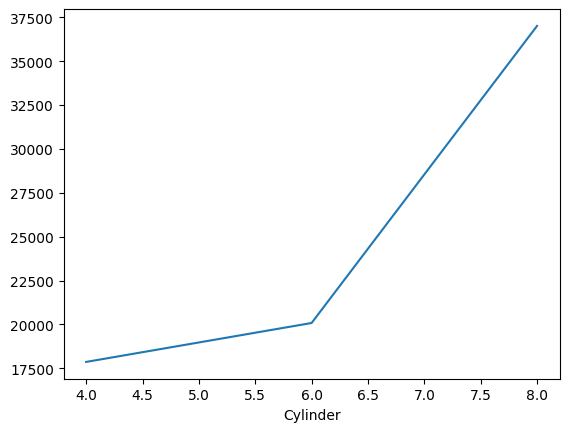

In [258]:
df.groupby("Cylinder")["Price"].mean().plot()

In [259]:
df.corr()

C:\Users\Revanth\AppData\Local\Temp\ipykernel_10788\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.138997,0.569795,0.570744,-0.108917,0.456111,-0.149583,0.155412
Mileage,-0.138997,1.000000,-0.028069,-0.016878,-0.015384,0.023516,-0.025447,-0.000876
Cylinder,0.569795,-0.028069,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.570744,-0.016878,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.108917,-0.015384,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.456111,0.023516,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.149583,-0.025447,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.155412,-0.000876,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


<AxesSubplot: xlabel='Liter'>

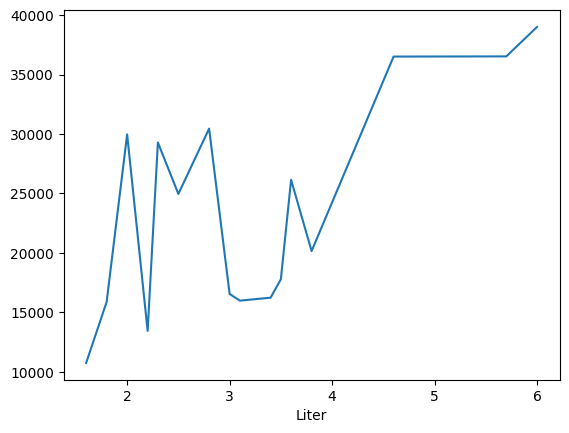

In [260]:
df.groupby("Liter")["Price"].mean().plot()

In [261]:
df.corr()

C:\Users\Revanth\AppData\Local\Temp\ipykernel_10788\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.138997,0.569795,0.570744,-0.108917,0.456111,-0.149583,0.155412
Mileage,-0.138997,1.000000,-0.028069,-0.016878,-0.015384,0.023516,-0.025447,-0.000876
Cylinder,0.569795,-0.028069,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.570744,-0.016878,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.108917,-0.015384,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.456111,0.023516,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.149583,-0.025447,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.155412,-0.000876,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


<AxesSubplot: xlabel='Doors'>

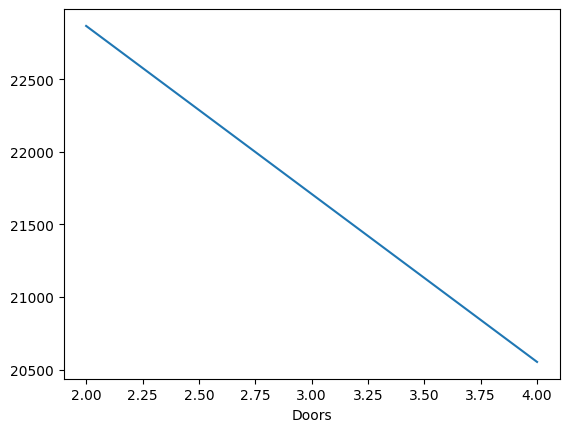

In [262]:
df.groupby("Doors")["Price"].mean().plot()

In [263]:
df.corr()

C:\Users\Revanth\AppData\Local\Temp\ipykernel_10788\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.138997,0.569795,0.570744,-0.108917,0.456111,-0.149583,0.155412
Mileage,-0.138997,1.000000,-0.028069,-0.016878,-0.015384,0.023516,-0.025447,-0.000876
Cylinder,0.569795,-0.028069,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.570744,-0.016878,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.108917,-0.015384,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.456111,0.023516,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.149583,-0.025447,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.155412,-0.000876,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


<AxesSubplot: xlabel='Cruise'>

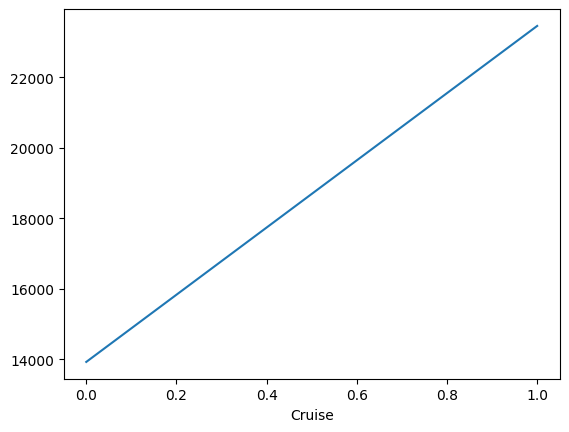

In [264]:
df.groupby("Cruise")["Price"].mean().plot()

In [265]:
df.corr()

C:\Users\Revanth\AppData\Local\Temp\ipykernel_10788\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.138997,0.569795,0.570744,-0.108917,0.456111,-0.149583,0.155412
Mileage,-0.138997,1.000000,-0.028069,-0.016878,-0.015384,0.023516,-0.025447,-0.000876
Cylinder,0.569795,-0.028069,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.570744,-0.016878,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.108917,-0.015384,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.456111,0.023516,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.149583,-0.025447,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.155412,-0.000876,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


<AxesSubplot: xlabel='Sound'>

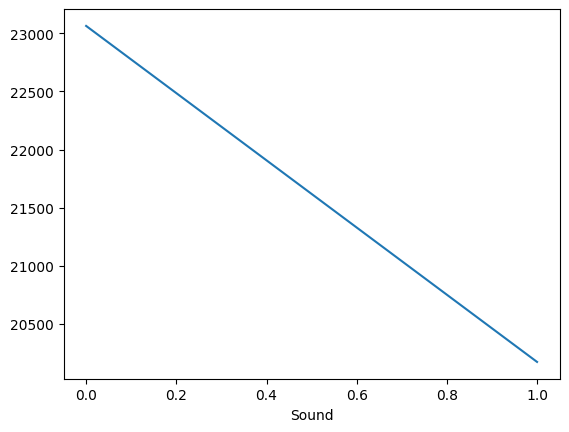

In [266]:
df.groupby("Sound")["Price"].mean().plot()

In [267]:
df.corr()

C:\Users\Revanth\AppData\Local\Temp\ipykernel_10788\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.138997,0.569795,0.570744,-0.108917,0.456111,-0.149583,0.155412
Mileage,-0.138997,1.000000,-0.028069,-0.016878,-0.015384,0.023516,-0.025447,-0.000876
Cylinder,0.569795,-0.028069,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.570744,-0.016878,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.108917,-0.015384,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.456111,0.023516,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.149583,-0.025447,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.155412,-0.000876,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


<AxesSubplot: xlabel='Leather'>

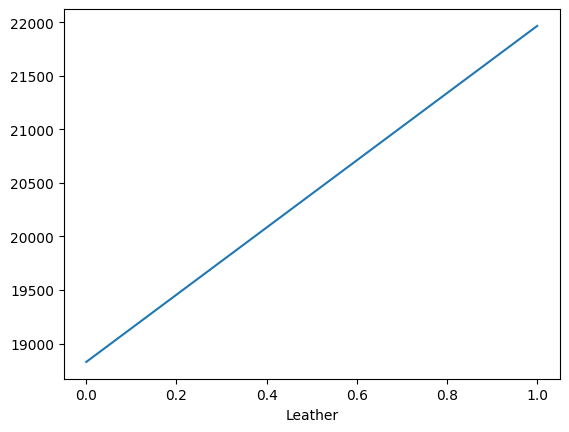

In [268]:
df.groupby("Leather")["Price"].mean().plot()

In [269]:
df.corr()

C:\Users\Revanth\AppData\Local\Temp\ipykernel_10788\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.138997,0.569795,0.570744,-0.108917,0.456111,-0.149583,0.155412
Mileage,-0.138997,1.000000,-0.028069,-0.016878,-0.015384,0.023516,-0.025447,-0.000876
Cylinder,0.569795,-0.028069,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.570744,-0.016878,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.108917,-0.015384,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.456111,0.023516,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.149583,-0.025447,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.155412,-0.000876,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


# Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

## Splitting of Dataset

In [270]:
X = df.loc[:,["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"]].values
Y = df.loc[:,"Price"].values

In [271]:
from sklearn.model_selection import train_test_split
X_Tr, X_Te, Y_Tr, Y_Te = train_test_split(X,Y,test_size=0.2)

## Model

In [272]:
from sklearn.linear_model import LinearRegression
L = LinearRegression()
L.fit(X_Tr, Y_Tr)

LinearRegression()

# Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data.

In [273]:
from sklearn import metrics
r = L.score(X_Tr, Y_Tr)
r

0.4640180287614165

In [274]:
coef_df = pd.DataFrame(L.coef_, index=["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"], columns=["Values"])

In [275]:
coef_df

,Values
Mileage,-0.146717
Cylinder,2001.268922
Liter,1162.943605
Doors,-751.800057
Cruise,6086.009501
Sound,-2506.810389
Leather,3054.306870


## Ridge Regression 

In [276]:
from sklearn.linear_model import Ridge
R2 = Ridge()
R2.fit(X_Tr, Y_Tr)
#y_predi = R.predict(x_test)
from sklearn import metrics
rr2 = R2.score(X_Te, Y_Te)
rr2

0.43358151425344893

In [277]:
print("The R2_Score obtained using Ridge Regression is",rr2)

The R2_Score obtained using Ridge Regression is 0.43358151425344893


## Lasso Regression

In [278]:
from sklearn.linear_model import Lasso
L2 = Lasso()
L2.fit(X_Tr, Y_Tr)
#y_predi = R.predict(x_test)
from sklearn import metrics
lar2 = L2.score(X_Te, Y_Te)
lar2

0.43370955701867075

In [279]:
print("The R2_Score obtained using Lasso Regression is",lar2)

The R2_Score obtained using Lasso Regression is 0.43370955701867075


# Find the combination of the factors that is the best predictor for price.

In [280]:
from itertools import combinations

In [281]:
Single_Comb_list = list(combinations(["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"], 1))

In [282]:
Single_Combo_R2 = []
for i in Single_Comb_list:
    X = df.loc[:,i].values
    Y = df.loc[:,"Price"].values
    from sklearn.model_selection import train_test_split
    train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.2, random_state=10)
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression()
    reg.fit(train_x, train_y)
    y_predicted = reg.predict(test_x)
    from sklearn import metrics
    s = reg.score(test_x,test_y)
    #print(s)
    Single_Combo_R2.append(s)

ind = Single_Combo_R2.index(max(Single_Combo_R2))
print("The best combination is :", *Single_Comb_list[ind])

The best combination is : Cylinder


In [283]:
Dual_Comb_list = list(combinations(["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"], 2))

In [284]:
Dual_Combo_R2 = []
for i in Dual_Comb_list:
    X = df.loc[:,i].values
    Y = df.loc[:,"Price"].values
    from sklearn.model_selection import train_test_split
    train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.2, random_state=10)
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression()
    reg.fit(train_x, train_y)
    y_predicted = reg.predict(test_x)
    from sklearn import metrics
    s = reg.score(test_x,test_y)
    #print(s)
    Dual_Combo_R2.append(s)

ind2 = Dual_Combo_R2.index(max(Dual_Combo_R2))
print("The best combination is :", *Dual_Comb_list[ind2])

The best combination is : Cylinder Cruise


In [285]:
Triple_Comb_list = list(combinations(["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"], 3))

In [286]:
Triple_Combo_R2 = []
for i in Triple_Comb_list:
    X = df.loc[:,i].values
    Y = df.loc[:,"Price"].values
    from sklearn.model_selection import train_test_split
    train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.2, random_state=10)
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression()
    reg.fit(train_x, train_y)
    y_predicted = reg.predict(test_x)
    from sklearn import metrics
    s = reg.score(test_x,test_y)
    #print(s)
    Triple_Combo_R2.append(s)

ind3 = Triple_Combo_R2.index(max(Triple_Combo_R2))
print("The best combination is :", *Triple_Comb_list[ind3])

The best combination is : Mileage Cylinder Cruise


## The Best Combinations are...

In [287]:
print("The Best Single Combination to Predict Price is", *Single_Comb_list[ind])
print("The Best Dual Combination to Predict Price is", *Dual_Comb_list[ind2])
print("The Best Triple Combination to Predict Price is", *Triple_Comb_list[ind3])


The Best Single Combination to Predict Price is Cylinder
The Best Dual Combination to Predict Price is Cylinder Cruise
The Best Triple Combination to Predict Price is Mileage Cylinder Cruise


# Hard Mode

## Research dummy variables in scikit-learn to see how to use the make, model, and body type.

In [288]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfle = df[['Make','Mileage','Cylinder','Liter', 'Doors', 'Cruise', 'Sound', 'Leather','Price']]
dfle.Make = le.fit_transform(dfle.Make)
c = dfle.loc[:,['Make']]
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
r = ohe.fit_transform(c).toarray()
e = pd.DataFrame(r)
dfle = dfle.drop("Make", axis=1)
e = e.loc[:,1:]
dfle = pd.concat([dfle,e],axis="columns")
X = dfle.loc[:,['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather',1,2,3,4,5]].values
Y = dfle.loc[:,"Price"]
from sklearn.model_selection import train_test_split
tr_x, te_x, tr_y, te_y = train_test_split(X,Y,test_size=0.3)
from sklearn.linear_model import LinearRegression
Lin_Reg = LinearRegression()
Lin_Reg.fit(tr_x,tr_y)
from sklearn import metrics
score = Lin_Reg.score(te_x, te_y)
print("The R2-Score is", score)

The R2-Score is 0.9182271782015687


C:\Users\Revanth\AppData\Local\Temp\ipykernel_10788\2704405347.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfle.Make = le.fit_transform(dfle.Make)


In [289]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfle = df[['Model','Mileage','Cylinder','Liter', 'Doors', 'Cruise', 'Sound', 'Leather','Price']]
dfle.Model = le.fit_transform(dfle.Model)
c = dfle.loc[:,['Model']]
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
r = ohe.fit_transform(c).toarray()
e = pd.DataFrame(r)
dfle = dfle.drop("Model", axis=1)
e = e.loc[:,1:]
dfle = pd.concat([dfle,e],axis="columns")
X = dfle.loc[:,['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather',1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]].values
Y = dfle.loc[:,"Price"]
from sklearn.model_selection import train_test_split
tr_x, te_x, tr_y, te_y = train_test_split(X,Y,test_size=0.3)
from sklearn.linear_model import LinearRegression
Lin_Reg = LinearRegression()
Lin_Reg.fit(tr_x,tr_y)
from sklearn import metrics
score = Lin_Reg.score(te_x, te_y)
print("The R2-Score is", score)

The R2-Score is 0.9684902610912969


C:\Users\Revanth\AppData\Local\Temp\ipykernel_10788\2660016380.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfle.Model = le.fit_transform(dfle.Model)


In [290]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfle = df[['Type','Mileage','Cylinder','Liter', 'Doors', 'Cruise', 'Sound', 'Leather','Price']]
dfle.Type = le.fit_transform(dfle.Type)
c = dfle.loc[:,['Type']]
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
r = ohe.fit_transform(c).toarray()
e = pd.DataFrame(r)
dfle = dfle.drop("Type", axis=1)
e = e.loc[:,1:]
dfle = pd.concat([dfle,e],axis="columns")
X = dfle.loc[:,['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather',1,2,3,4]].values
Y = dfle.loc[:,"Price"]
from sklearn.model_selection import train_test_split
tr_x, te_x, tr_y, te_y = train_test_split(X,Y,test_size=0.3)
from sklearn.linear_model import LinearRegression
Lin_Reg = LinearRegression()
Lin_Reg.fit(tr_x,tr_y)
from sklearn import metrics
score = Lin_Reg.score(te_x, te_y)
print("The R2-Score is", score)

C:\Users\Revanth\AppData\Local\Temp\ipykernel_10788\3879148835.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfle.Type = le.fit_transform(dfle.Type)


The R2-Score is 0.6876708843380482
